## Bellabeat Fitbit EDA

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv("dailyActivity_merged.csv")

### Quick Look at Data

In [3]:
df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### No. of Rows and Column 

In [4]:
print('no. of rows:',df.shape[0])
print('no. of columns:',df.shape[1])


no. of rows: 940
no. of columns: 15


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
#converting date to date format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [7]:
df['ActivityDate'].dtype

dtype('<M8[ns]')

In [8]:
#cleaning COlumns name 
df.columns = df.columns.str.strip()

In [9]:
#checking for null values
df.isna().sum()


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [10]:
#checking for duplicate values

df.duplicated().sum()

0

## Creating new Columns

In [11]:
# Total active minutes
df['ActiveMinutesTotal'] = (
    df['VeryActiveMinutes'] + 
    df['FairlyActiveMinutes'] + 
    df['LightlyActiveMinutes']
)

In [12]:
df.shape

(940, 16)

In [13]:
# Sedentary ratio
df['SedentaryRatio'] = df['SedentaryMinutes'] / (
    df['SedentaryMinutes'] + df['ActiveMinutesTotal']
)

In [14]:
# Calories per step
df['CaloriesPerStep'] = df['Calories'] / df['TotalSteps'].replace(0, np.nan)

In [15]:
# Step goal flag
df['StepGoalMet'] = (df['TotalSteps'] >= 10000).astype(int)

In [16]:
df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutesTotal,SedentaryRatio,CaloriesPerStep,StepGoalMet
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,0.665448,0.150813,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,0.751210,0.167396,1
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,0.845833,0.169790,1
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,0.727455,0.178754,0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,0.743269,0.147052,1


In [17]:
df.shape

(940, 19)

#### We have added 4 columns 
- ActiveMinutesTotal
- SedentaryRatio
- CaloriesPerStep
- StepGoalMet

## Exploratory Data Analysis (EDA)

In [18]:
# summary stats

df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutesTotal,SedentaryRatio,CaloriesPerStep,StepGoalMet
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,863.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,227.542553,0.799837,1.680172,0.322340
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069705,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,146.750000,0.730490,0.219634,0.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,247.000000,0.785858,0.297393,0.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,317.250000,0.876036,0.443895,1.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000,1.000000,337.000000,1.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,121.776307,0.117836,15.457368,0.467621


#### Correlation Heatmap

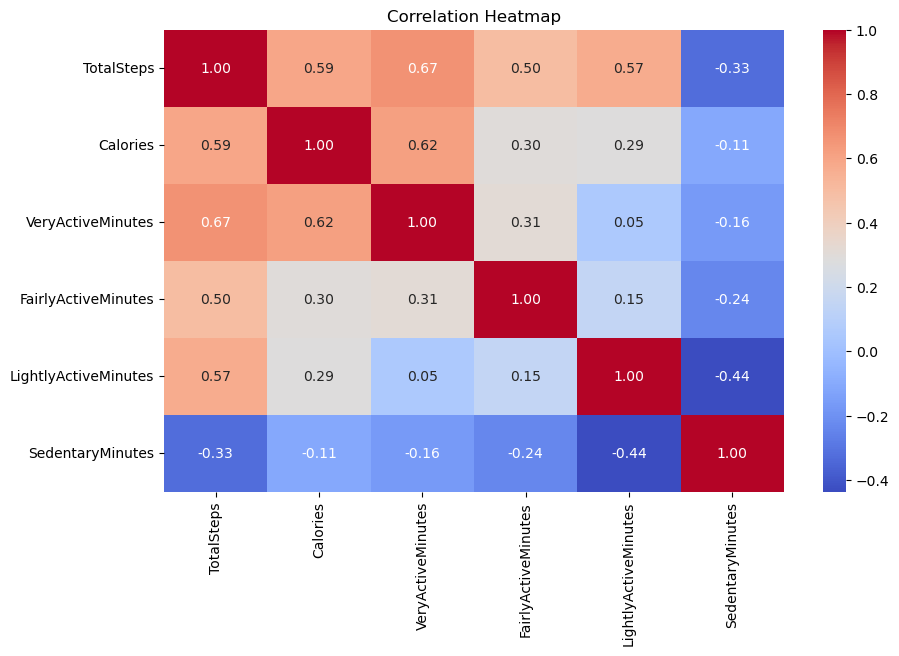

In [19]:
plt.figure(figsize=(10,6))
corr = df[['TotalSteps', 'Calories', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observation:**  
There is a strong positive correlation between steps and calories burned.  
Sedentary minutes are negatively correlated with active minutes, as expected.  
This confirms activity directly influences calorie expenditure.

### Time-Series Analysis:Daily Average Steps with Rolling 7-Day Trend

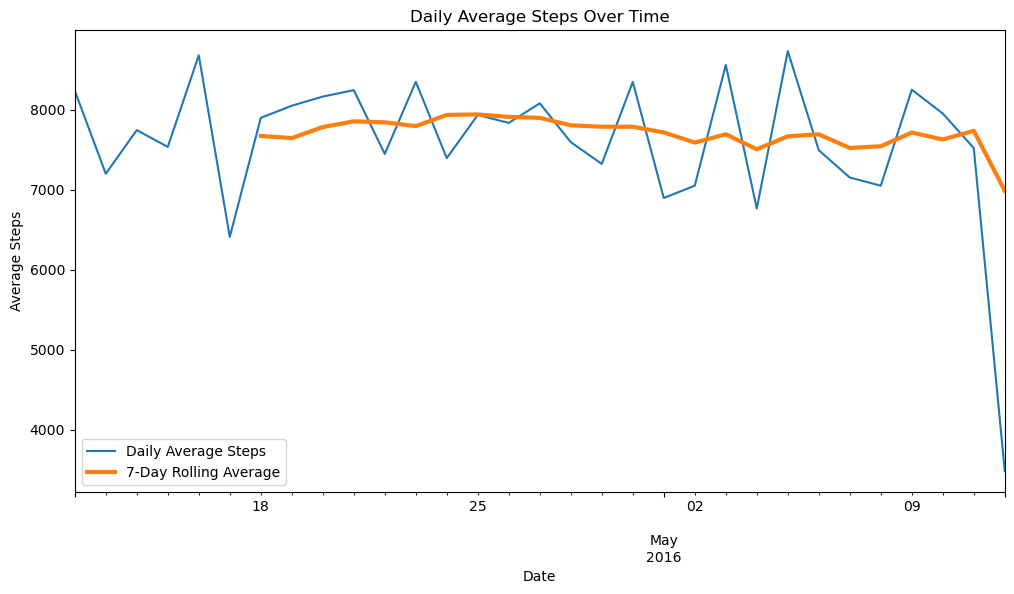

In [20]:
daily_avg = df.groupby('ActivityDate')['TotalSteps'].mean()

plt.figure(figsize=(12,6))
daily_avg.plot(label='Daily Average Steps')
daily_avg.rolling(7).mean().plot(label='7-Day Rolling Average', linewidth=3)
plt.title("Daily Average Steps Over Time")
plt.xlabel("Date")
plt.ylabel("Average Steps")
plt.legend()
plt.show()



**Observation:**  
Daily steps fluctuate significantly, but the rolling 7-day average highlights consistent patterns.  
Peaks suggest days of higher engagement, while troughs may align with weekends or rest days.

### Weekday Patterns: Average Steps by Day of the Week


C:\Users\shashank\AppData\Local\Temp\ipykernel_21320\3512488686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_steps.index, y=weekday_steps.values,palette="viridis")


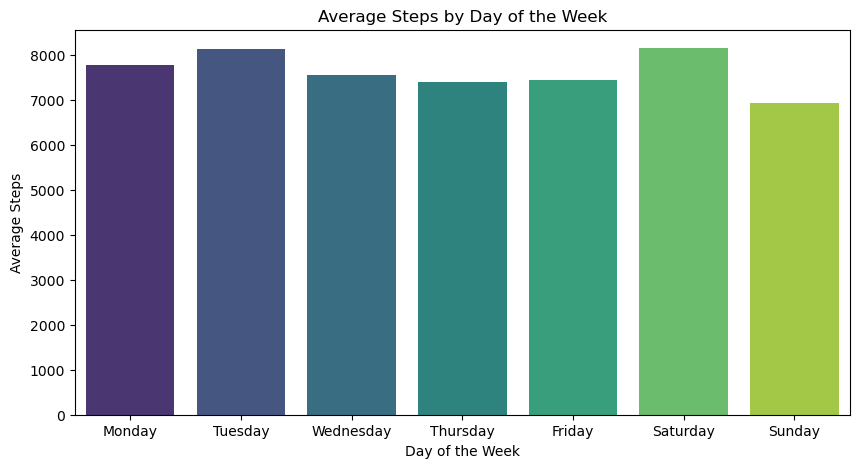

In [25]:
df['Weekday'] = df['ActivityDate'].dt.day_name()
weekday_steps = df.groupby('Weekday')['TotalSteps'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_steps.index, y=weekday_steps.values,palette="viridis")
plt.title("Average Steps by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Steps")
plt.show()


**Observation:**  
Users are generally more active on weekdays, while weekends show a noticeable drop in average steps.  
This trend indicates weekday routines encourage movement, while weekends are more sedentary.


### Histogram: Distribution of Daily Steps

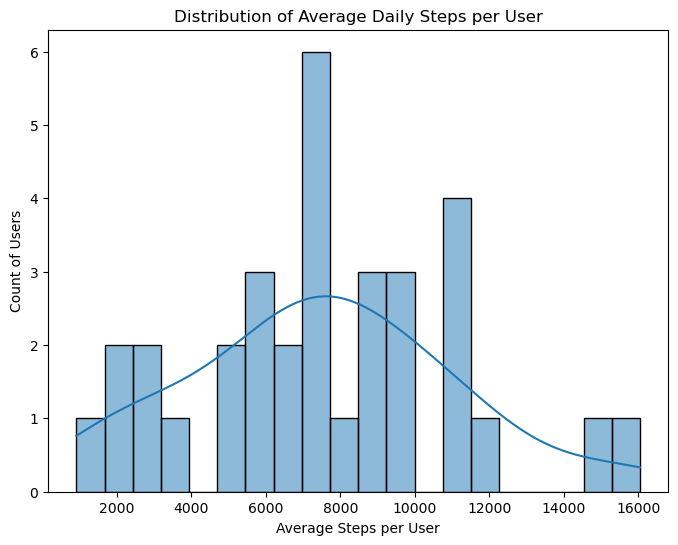

In [38]:
user_avg_steps = df.groupby('Id')['TotalSteps'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.histplot(user_avg_steps['TotalSteps'], bins=20, kde=True)
plt.title("Distribution of Average Daily Steps per User")
plt.xlabel("Average Steps per User")
plt.ylabel("Count of Users")
plt.show()


**Observation:**  
Most users take fewer than 10,000 steps daily, which is below the commonly recommended goal.  
A smaller group of users consistently achieves higher step counts, showing diverse activity levels.


### Scatterplot: Steps vs Sedentary Minutes


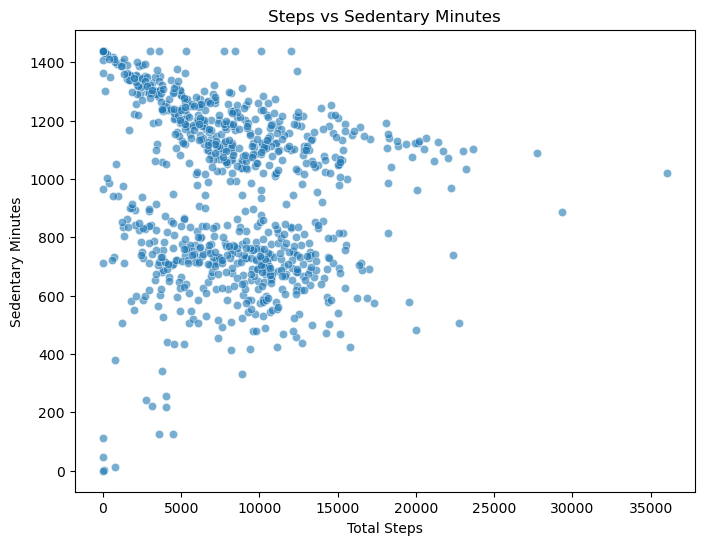

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TotalSteps', y='SedentaryMinutes', alpha=0.6)
plt.title("Steps vs Sedentary Minutes")
plt.xlabel("Total Steps")
plt.ylabel("Sedentary Minutes")
plt.show()


**Observation:**  
Users with higher step counts generally spend less time in sedentary behavior.  
However, there are a few outliers who record moderate steps but still spend a large portion of the day sedentary.  
This highlights varying lifestyle patterns among users.

### User-Level Distribution: Average Steps per Users

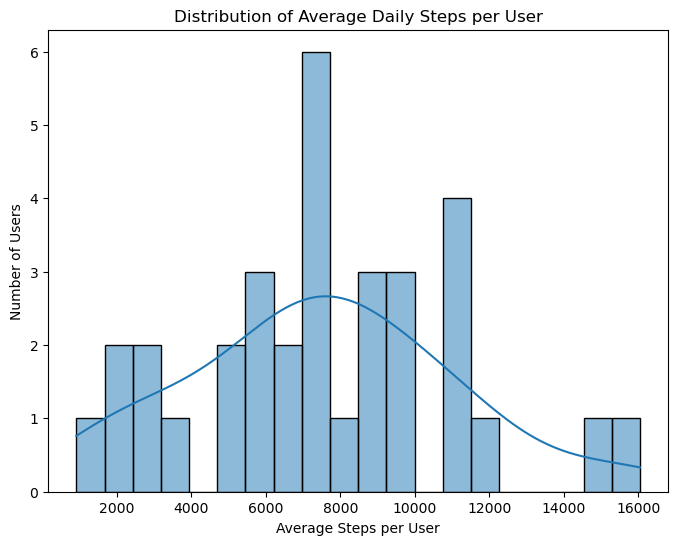

In [40]:
user_avg_steps = df.groupby('Id')['TotalSteps'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.histplot(user_avg_steps['TotalSteps'], bins=20, kde=True)
plt.title("Distribution of Average Daily Steps per User")
plt.xlabel("Average Steps per User")
plt.ylabel("Number of Users")
plt.show()


**Observation:**  
Most users average fewer than 10,000 steps per day, showing that many are not meeting the recommended activity levels.  
A small group of highly active users consistently achieve higher daily steps, but the overall trend suggests low to moderate activity among the majority.
